# ====================================
##  George Rubio & Sara Marin
# ====================================

# ====================================
##  Clasificación del dataset Iris con Regresión Lineal 
# ====================================

# Importamos librerías necesarias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score, confusion_matrix


# ====================================
# 1. Cargar dataset Iris
# ====================================

In [2]:
iris = datasets.load_iris()

# Creamos un DataFrame con los datos

In [3]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = df['target'].apply(lambda x: iris.target_names[x])

print("Primeras filas del dataset:")
display(df.head())

Primeras filas del dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


# ====================================
# 2. Variables predictoras (X) y variable objetivo (y)
# ====================================

In [4]:
X = iris.data  # características
y = iris.target  # etiquetas numéricas

# ====================================
# 3. Binarización de etiquetas para usar regresión lineal
# (One-vs-Rest)
# ====================================

In [5]:
lb = LabelBinarizer()
y_bin = lb.fit_transform(y)

# Ahora y_bin tiene 3 columnas (una por cada especie de Iris)

# ====================================
# 4. Dividir en entrenamiento y prueba
# ====================================

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_bin, test_size=0.3, random_state=42
)

# ====================================
# 5. Entrenamiento de modelo
# ====================================

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# ====================================
# 6. Predicción
# ====================================

In [8]:
y_pred = model.predict(X_test)

# Como los valores son continuos, escogemos la clase
# con el valor más alto (argmax)

In [9]:
y_pred_class = np.argmax(y_pred, axis=1)
y_test_class = np.argmax(y_test, axis=1)

# ====================================
# 7. Evaluación del modelo
# ====================================

In [10]:
acc = accuracy_score(y_test_class, y_pred_class)
print(f"📊 Precisión del modelo: {acc:.2f}")

📊 Precisión del modelo: 0.82


# Matriz de confusión

In [11]:
cm = confusion_matrix(y_test_class, y_pred_class)

# ====================================
# 8. Graficar resultados
# ====================================

# --- 8.1 Matriz de confusión ---

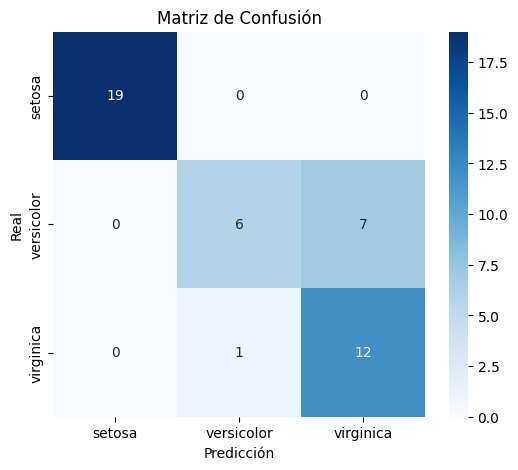

In [12]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# --- 8.2 Gráfico de dispersión ---
# Visualizamos 2 características para ver la separación entre clases

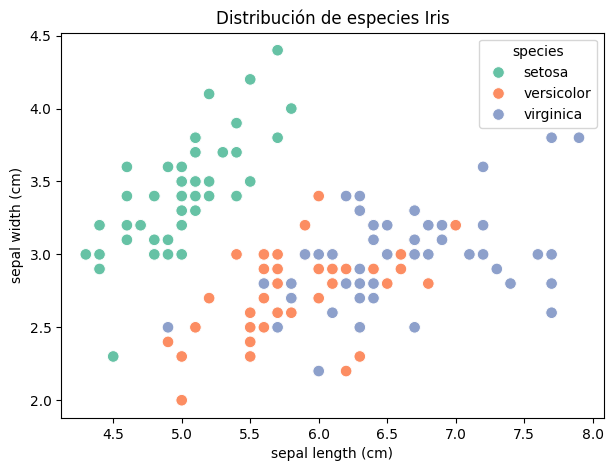

In [13]:
plt.figure(figsize=(7, 5))
sns.scatterplot(
    x=df.iloc[:, 0], y=df.iloc[:, 1],
    hue=df['species'], palette="Set2", s=70
)
plt.title("Distribución de especies Iris")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

# --- 8.3 Comparación real vs predicho ---

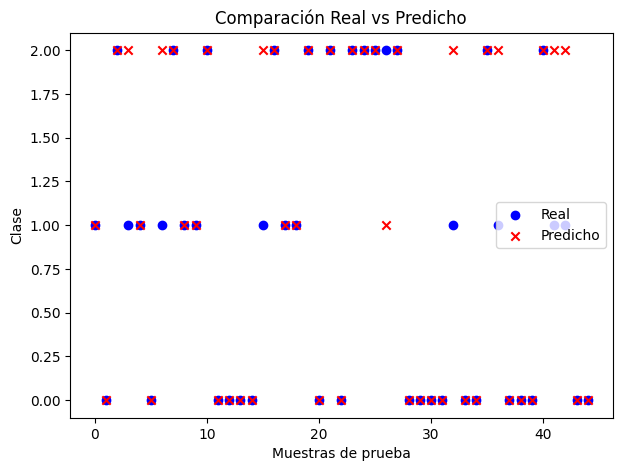

In [14]:
plt.figure(figsize=(7, 5))
plt.scatter(range(len(y_test_class)), y_test_class, label="Real", c="blue")
plt.scatter(range(len(y_pred_class)), y_pred_class, label="Predicho", c="red", marker="x")
plt.title("Comparación Real vs Predicho")
plt.xlabel("Muestras de prueba")
plt.ylabel("Clase")
plt.legend()
plt.show()